In [12]:
%load_ext autoreload
%autoreload 2


import os

os.chdir(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
'''try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle'''
    
    
import pickle as pickle

    
import torchvision.transforms as transforms
from utils.mnist import IndexedMNIST as mnist

from utils import show_batch, make_image
import matplotlib.pyplot as plt
import numpy as np
import pdb
import torch

import seaborn as sns
import time
import pandas as pd


from IPython.display import clear_output

'\nimport torch.utils.data as data\nimport torch.nn as nn\nimport torchvision\nfrom numpy.linalg import norm\nimport torch.nn.functional as F\nfrom utils.divergence import js_divergence, kl_divergence, js_distance,cartesian_js\nfrom sklearn import (manifold, datasets, decomposition, ensemble,\n                     discriminant_analysis, random_projection, neighbors)\n\nfrom notebooks.analysis_utils import *\n\nfrom matplotlib import offsetbox\n\nassert(dataset_name == \'cifar10\')\nnp.seterr(all=\'warn\')\n\ndataset = "cifar10"\n\nclasses'

In [182]:

import pickle5 as pickle

directories = [
    #"control",
    #"beta1",
    #"beta3",
    #"compact0.1",
    "compact0.1_epoch0_confidence0.8",
    "compact0.1_epoch10_confidence0.8",
    #"compact0.5_epoch0_confidence0.8"
    ]


def load_blobs(files, blob_type="train"):
    start = time.time()
    blob_runs = []
    for count, file in enumerate(files):

        print ("Progress: {:0.2f} %, {} Seconds ".format((count + 1)/len(files) * 100, time.time() - start))
        clear_output(wait=True)
        with open(file + "/{}-log.txt.logger.blob.pickle".format(blob_type), 'rb') as handle:
            run = pickle.load(handle)
        blob_runs.append(run)
    return blob_runs


results = {}

for dname in directories:
    d =  "./logs/" + dname
    dir_name = d + "_stats"
    files = [os.path.join(d, file)  for file in os.listdir(d) if "result" in file] #startswith("result-")][:5]
    results[dname] = {"train": load_blobs(files), "test":load_blobs(files, "test")}


Progress: 100.00 %, 8.106231689453125e-06 Seconds 


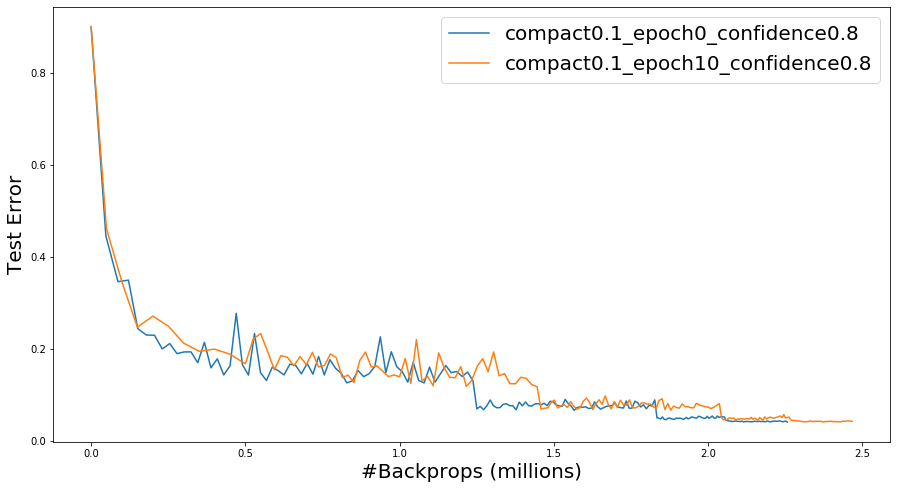

In [183]:
fig, ax = plt.subplots(figsize=(15, 8))

for dname in directories:
    num_backprops = np.cumsum([0] + results[dname]['train'][0]['epoch_backprops'])
    test_error = 1 - np.array(results[dname]['test'][0]['epoch_pred1'])
    plt.plot(num_backprops / 1e+6, test_error)

ax.set_xlabel("#Backprops (millions)", size=20)
ax.set_ylabel("Test Error", size=20)
plt.legend(directories,  fontsize=20)

#plt.legend(["Standard", "SB (beta=1)", "SB (beta=3)", "compaction, sample prob 0.1, confidence 0.8"],  fontsize=20)

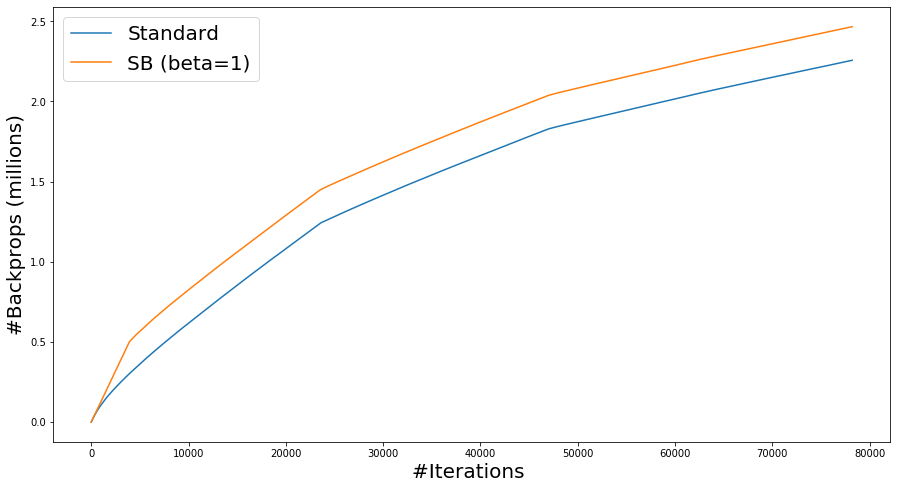

In [184]:
fig, ax = plt.subplots(figsize=(15, 8))

for dname in directories:

    plt.plot(np.cumsum(results[dname]['train'][0]['backprops']) / 1e+6)

ax.set_xlabel("#Iterations ", size=20)
ax.set_ylabel("#Backprops (millions)", size=20)
plt.legend(directories,  fontsize=20)
plt.legend(["Standard", "SB (beta=1)", "SB (beta=3)", "compaction, sample prob 0.1, confidence 0.8"],  fontsize=20)

In [173]:
for dname in directories:

    num_backprops = np.cumsum(results[dname]['train'][0]['epoch_backprops'])
    test_acc = np.array(results[dname]['test'][0]['epoch_pred1'])
    print (dname, test_acc.max())

control 0.9638
beta1 0.9614
beta3 0.9567
compact0.1_epoch0_confidence0.8 0.9586


/Users/tenghu/Code/env/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


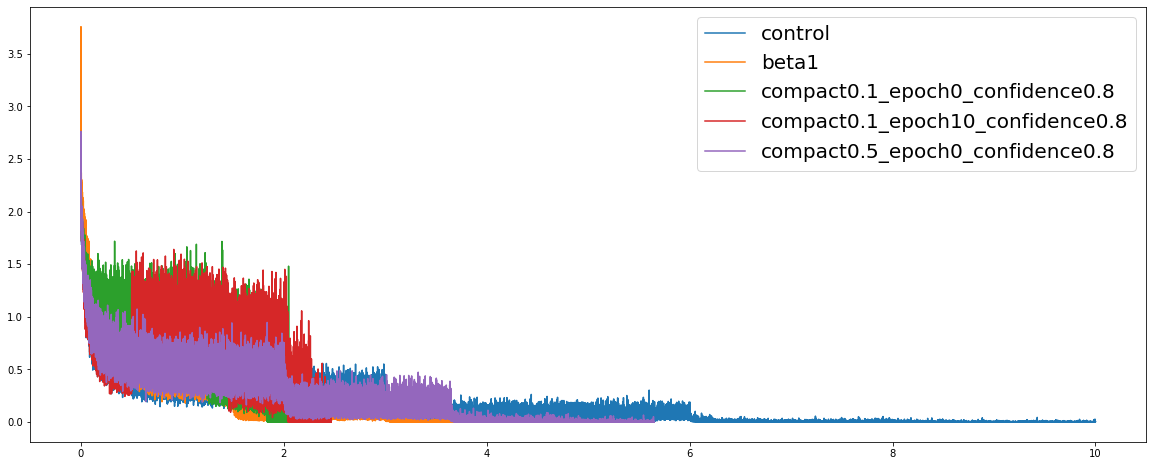

In [134]:
fig, ax = plt.subplots(figsize=(20, 8))

for dname in directories:
    num_backprops = np.cumsum(results[dname]['train'][0]['backprops'])
    plt.plot(num_backprops / 1e+6, results[dname]['train'][0]['train_loss'])


plt.legend(directories,  fontsize=20)